In [87]:
import lsst.daf.persistence as dafPersist
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import math

# List of visits to be considered
visits = [845346, 849375, 852894, 850590, 836494]
#visits = [849375, 850587]

# Reference visit
ref = 845346

# Tract
tract = 0

# List of CCD to be considered (source calatlogs will be concateneted)
#ccd = [12, 13, 14, 21, 22, 23]
ccd = [0, 1, 7, 8, 27, 28, 33, 35]
ccd = range(0,36)
#ccd = [21, 22, 27, 28]
#ccd = [14]

filter = 'r'

Flags = ["base_PixelFlags_flag_saturated", "base_PixelFlags_flag_cr", "base_PixelFlags_flag_interpolated",
         "base_PsfFlux_flag_edge", "base_CircularApertureFlux_4_5_flag", "base_SdssCentroid_flag", 
         "base_SdssShape_flag"]

#setup butler - Replace path name by something suitable for you
butler = dafPersist.Butler("/datadec/cppm/jpreyes/CFHT_Jointcal_2/jointcal_test_2")


In [88]:
for indx, c in enumerate(ccd) :
    dataid = {'visit':ref, 'filter':filter, 'ccd':c}
    if butler.datasetExists('src', dataid):
    
        oldSrc = butler.get('src', dataid, immediate=True)
        print c, len(oldSrc)
        if indx == 0 :
            # retrieve the schema of the source catalog and extend it in order to add a field to record the ccd number
            oldSchema = oldSrc.getSchema()
            mapper = afwTable.SchemaMapper(oldSchema)
            mapper.addMinimalSchema(oldSchema)
            newSchema = mapper.getOutputSchema()
            newSchema.addField("ccd", type="I", doc="CCD number")

            #create the new extented source catalog 
            srcRef = afwTable.SourceCatalog(newSchema)

        # create temporary catalog
        tmpCat = afwTable.SourceCatalog(srcRef.table)
        tmpCat.extend(oldSrc, mapper=mapper)
        # fill in the ccd information in numpy mode in order to be efficient
        tmpCat['ccd'][:] = c
        # append the temporary catalog to the extended source catalog    
        srcRef.extend(tmpCat, deep=False)

print "Ref...", len(srcRef)

0 2109
1 2588
2 3000
3 2528
4 2799
5 2940
6 2390
7 2725
8 2695
9 2769
10 2644
11 2732
12 2243
13 2282
14 2601
15 3182
16 2519
17 1990
18 2321
19 2235
20 2481
21 2295
22 2439
23 2558
24 2548
25 2276
26 2090
27 2567
28 2265
29 2110
30 3097
31 3684
32 2316
33 2674
34 2494
35 2308
Ref... 91494


In [98]:
oldSrc = butler.get('src', dataid, immediate=True)
s = srcRef[0].schema
eK = s["base_ClassificationExtendedness_value"].asKey()

In [99]:
for s in oldSrc:
    print s.get(eK)

nan
nan
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
nan
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
nan
1.0
0.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0


In [79]:
mag = []
oldDist = []
newDist = []
for v in visits :
        if v == ref :
            continue
        for indx, c in enumerate(ccd) :

            dataid = {'visit':v, 'filter':filter, 'ccd':c}
            if butler.datasetExists('src', dataid):
                oldSrc = butler.get('src', dataid, immediate=True)
                if indx == 0 :
                    # retrieve the schema of the source catalog and extend it in order to add a field to record the ccd number
                    oldSchema = oldSrc.getSchema()
                    mapper = afwTable.SchemaMapper(oldSchema)
                    mapper.addMinimalSchema(oldSchema)
                    newSchema = mapper.getOutputSchema()
                    newSchema.addField("ccd", type="I", doc="CCD number")

                    #create the new extented source catalog 
                    srcVis = afwTable.SourceCatalog(newSchema)

                # create temporary catalog
                tmpCat = afwTable.SourceCatalog(srcRef.table)
                tmpCat.extend(oldSrc, mapper=mapper)
                # fill in the ccd information in numpy mode in order to be efficient
                tmpCat['ccd'][:] = c
                # append the temporary catalog to the extended source catalog    
                srcVis.extend(tmpCat, deep=False)

        print "Visit :", v, "nbr of sources :", len(srcVis)
        match = afwTable.matchRaDec(srcRef, srcVis, afwGeom.Angle(1./3600., afwGeom.degrees))
        print "Visit :", v, " - ",  len(match), "matches found"
        schemaRef = srcRef.getSchema()
        schemaVis = srcVis.getSchema()
        flagKeyRef = []
        flagKeyVis = []
        for f in Flags :
            keyRef = schemaRef[f].asKey()
            flagKeyRef.append(keyRef)
            keyVis = schemaVis[f].asKey()
            flagKeyVis.append(keyVis)

        extendKey = schemaRef["base_ClassificationExtendedness_value"].asKey()
        fluxKey = schemaRef["base_CircularApertureFlux_4_5_flux"].asKey()
        fluxSigmaKey = schemaRef["base_CircularApertureFlux_4_5_fluxSigma"].asKey()
        ccdKeyRef = schemaRef["ccd"].asKey()
        ccdKeyVis = schemaVis["ccd"].asKey()
        for m in match :
            mRef = m.first
            mVis = m.second

            for f in flagKeyRef :
                if mRef.get(f) :
                    continue
            for f in flagKeyVis :
                if mVis.get(f) :
                    continue

            # cleanup the reference sources in order to keep only decent star-like objects
            if mRef.get(extendKey) >= 0.5 :
                continue

            ang = afwGeom.radToMas(m.distance)

            # retrieve the CCD corresponding to the reference source
            ccdRef = mRef.get(ccdKeyRef)
            ccdVis = mVis.get(ccdKeyVis)

            # retrieve the calibration object associated to the CCDs
            didRef = {'visit':ref, 'filter':filter, 'ccd':ccdRef}
            didRef2 = {'visit':ref, 'filter':filter, 'ccd':ccdRef, 'tract':tract}
            mdRef = butler.get("calexp_md", didRef, immediate=True)
            calib = afwImage.Calib(mdRef)
            # compute magnitude
            flux = mRef.get(fluxKey)
            fluxSigma = mRef.get(fluxSigmaKey)
            if flux /fluxSigma < 5 :
                continue
            if flux > 0. :
                refMag = calib.getMagnitude(flux)
            else :
                continue
            if refMag < 16.5 :
                continue

            footprint = mVis.getFootprint()
            if footprint is not None and len(footprint.getPeaks()) > 1 :
                continue

            # retrieve the improved wcs and update the coordinate accordingly
            oldWcsRef = afwImage.makeWcs(mdRef)
            oldCoordRef = mRef.getCoord()
            pixelsRef = oldWcsRef.skyToPixel(oldCoordRef.getRa(), oldCoordRef.getDec())

            newWcsRefCont = butler.get('wcs', didRef2, immediate=True)
            newWcsRef = newWcsRefCont.getWcs()
            newCoordRef = newWcsRef.pixelToSky(pixelsRef).toIcrs()

            didVis = {'visit':v, 'filter':filter, 'ccd':ccdVis}
            didVis2 = {'visit':v, 'filter':filter, 'ccd':ccdVis, 'tract':tract}
            mdVis = butler.get("calexp_md", didVis, immediate=True)
            oldWcsVis = afwImage.makeWcs(mdVis)
            oldCoordVis = mVis.getCoord()
            pixelsVis = oldWcsVis.skyToPixel(oldCoordVis.getRa(), oldCoordVis.getDec())
            newWcsVisCont = butler.get('wcs', didVis2, immediate=True)
            newWcsVis = newWcsVisCont.getWcs()
            newCoordVis = newWcsVis.pixelToSky(pixelsVis).toIcrs()

            newAngle = 1000.0*newCoordRef.angularSeparation(newCoordVis).asArcseconds()       

            mag.append(refMag)
            oldDist.append(ang)
            newDist.append(newAngle)

            if refMag<20 and newAngle>400 :
                print v, newAngle, refMag, ccdRef, ccdVis, mRef.getCoord(), newCoordVis


Visit : 849375 nbr of sources : 47657
Visit : 849375  -  40560 matches found
849375 605.501315102 17.8706301139 32 32 IcrsCoord(214.7578594, 52.2316955) IcrsCoord(214.7578538, 52.2318525)
849375 768.267997796 19.2254109585 29 29 IcrsCoord(215.1345167, 52.2611377) IcrsCoord(215.1348285, 52.2610960)
849375 402.201245783 19.3940756908 31 31 IcrsCoord(214.9376396, 52.3663587) IcrsCoord(214.9378747, 52.3663799)
849375 843.837821962 18.691012928 18 19 IcrsCoord(215.4870225, 52.6512802) IcrsCoord(215.4866825, 52.6509597)
849375 655.304281723 19.3790232074 13 13 IcrsCoord(214.9225253, 52.6737888) IcrsCoord(214.9227224, 52.6736706)
849375 633.215950363 17.6789060362 13 13 IcrsCoord(214.7808585, 52.7750116) IcrsCoord(214.7810811, 52.7750616)
849375 401.723709602 17.7680842729 10 10 IcrsCoord(215.4795713, 52.8208321) IcrsCoord(215.4702395, 52.8177484)
849375 647.103373234 19.8117528209 14 14 IcrsCoord(214.7236195, 52.8961975) IcrsCoord(214.7235756, 52.8959990)
849375 409.589068702 17.5298582978 2

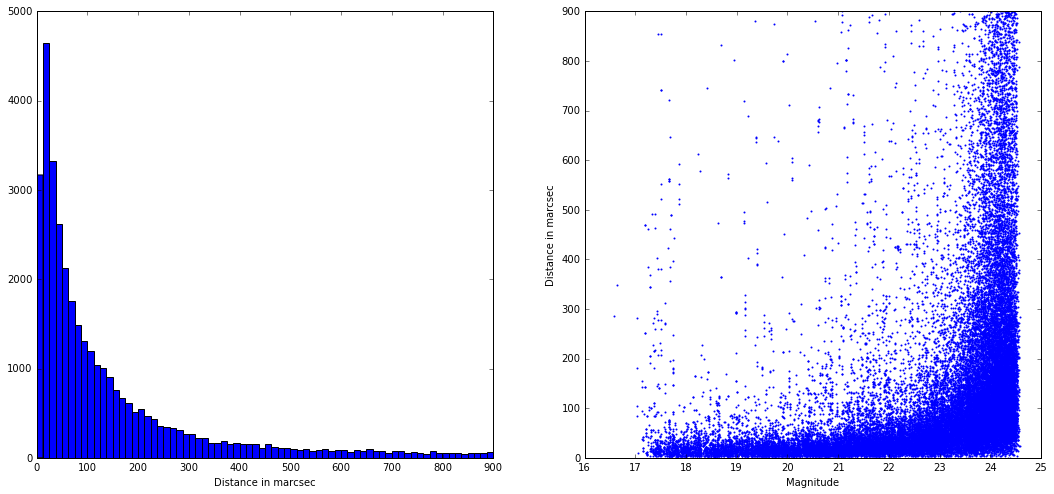

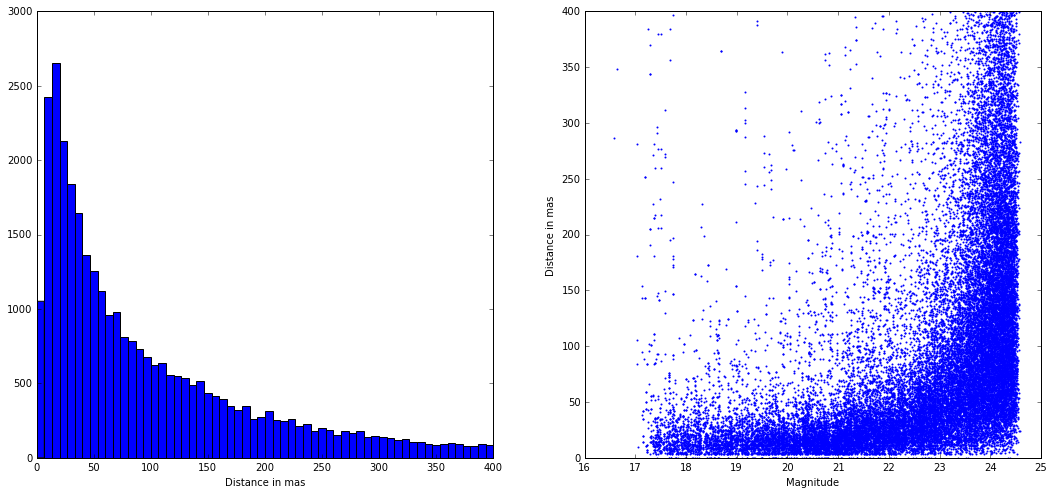

Median value of the astrometric scatter : 76.0362967555 mas


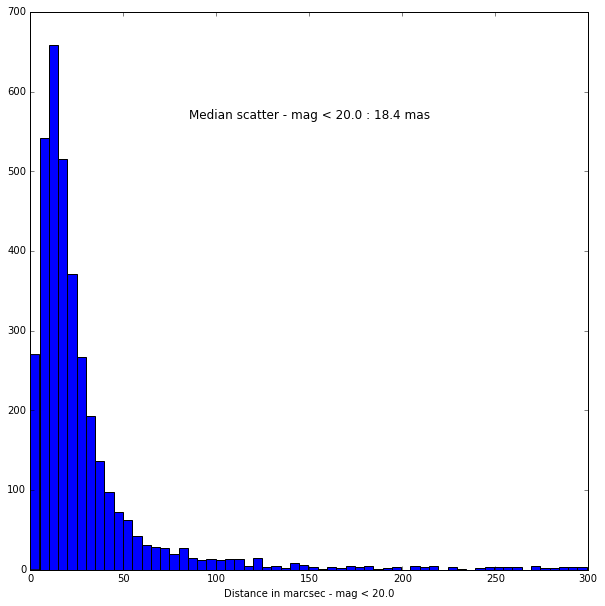

Median scatter - mag < 20.0 : 18.4 mas


In [80]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

# Plot distance between sources in different exposures
plt.clf()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18,
                                                 8))
ax0.hist(oldDist, bins=80)
ax1.scatter(mag, oldDist, s=1, color='b')
ax0.set_xlim([0., 900.])
ax0.set_xlabel("Distance in marcsec")
ax1.set_xlabel("Magnitude")
ax1.set_ylabel("Distance in marcsec")
ax1.set_ylim([0., 900.])
plt.show()

plt.clf()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
ax0.hist(oldDist,bins=150)
ax0.set_xlim([0.,400.])
ax1.scatter(mag, oldDist, s=1, color='b')
ax1.set_ylim([0.,400.])
ax0.set_xlabel("Distance in mas")
ax1.set_xlabel("Magnitude")
ax1.set_ylabel("Distance in mas")
plt.show()

print "Median value of the astrometric scatter :", np.median(oldDist), "mas"

magLim = 20
idxs = np.where(np.asarray(mag) < magLim)
plt.clf()
fig, ax0 = plt.subplots(ncols=1, figsize=(10,10))
ax0.hist(np.asarray(oldDist)[idxs], bins=200)
ax0.set_xlabel("Distance in marcsec - mag < %0.1f"%(magLim))
ax0.set_xlim([0,300])
ax0.set_title("Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(oldDist)[idxs])),x=0.5, y=0.8)
plt.show()

print "Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(oldDist)[idxs]))

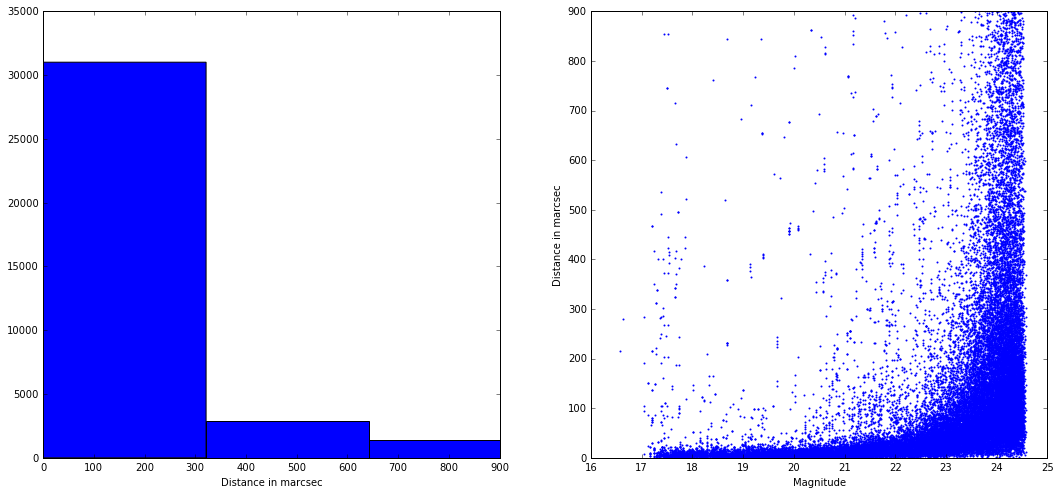

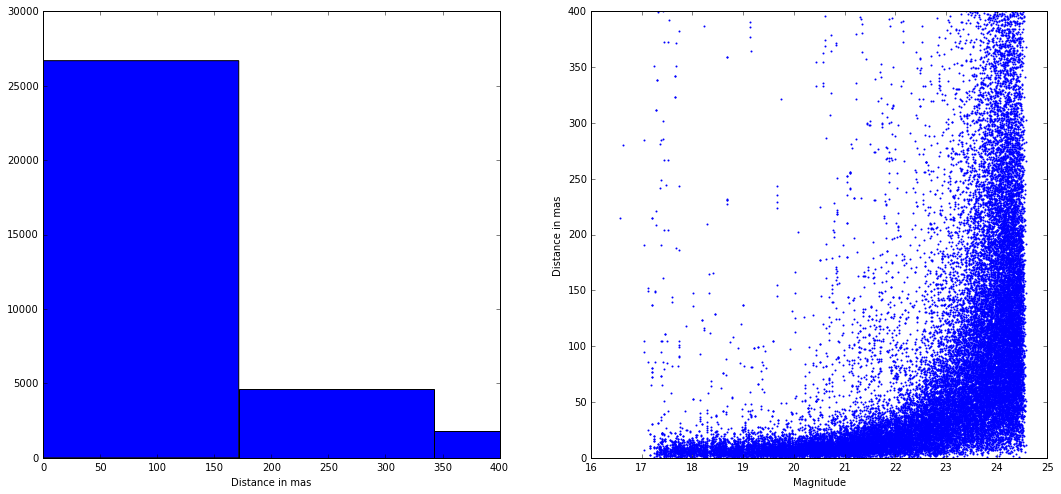

Median value of the astrometric scatter : 62.9737854509 mas


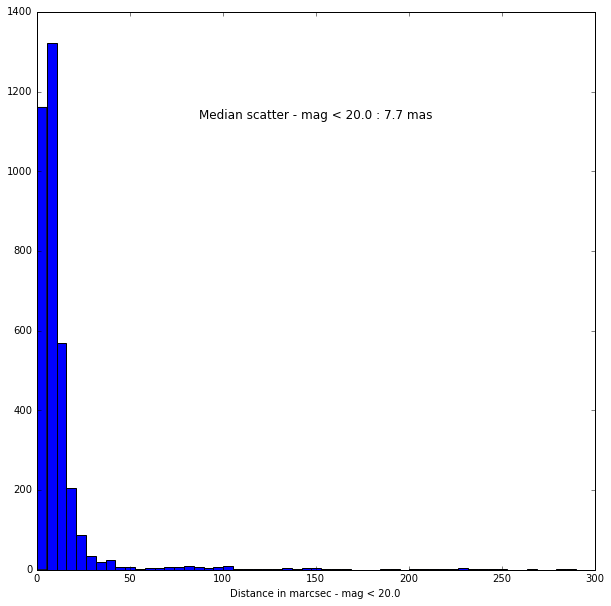

Astrometric scatter (median) - mag < 20.0 : 7.7 mas


In [81]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

# Plot distance between sources in different exposures
plt.clf()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
ax0.hist(newDist, bins=80)
ax1.scatter(mag, newDist, s=1, color='b')
ax0.set_xlim([0., 900.])
ax0.set_xlabel("Distance in marcsec")
ax1.set_xlabel("Magnitude")
ax1.set_ylabel("Distance in marcsec")
ax1.set_ylim([0., 900.])
plt.show()

plt.clf()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18, 8))
ax0.hist(newDist,bins=150)
ax0.set_xlim([0.,400.])
ax1.scatter(mag, newDist, s=1, color='b')
ax1.set_ylim([0.,400.])
ax0.set_xlabel("Distance in mas")
ax1.set_xlabel("Magnitude")
ax1.set_ylabel("Distance in mas")
plt.show()

print "Median value of the astrometric scatter :", np.median(newDist), "mas"

magLim = 20
idxs = np.where(np.asarray(mag) < magLim)
plt.clf()
fig, ax0 = plt.subplots(ncols=1, figsize=(10,10))
ax0.hist(np.asarray(newDist)[idxs], bins=200)
ax0.set_xlabel("Distance in marcsec - mag < %0.1f"%(magLim))
ax0.set_xlim([0,300])
ax0.set_title("Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(newDist)[idxs])),x=0.5, y=0.8)
plt.show()

print "Astrometric scatter (median) - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(newDist)[idxs]))

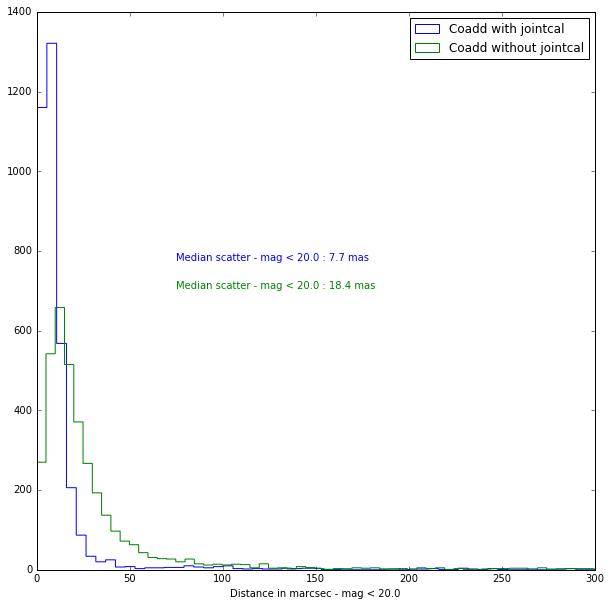

Astrometric scatter (median) - mag < 20.0 : 18.4 mas


In [82]:
plt.clf()
fig, ax0 = plt.subplots(ncols=1, figsize=(10,10))
ax0.hist(np.asarray(newDist)[idxs], bins=200, histtype="step", label="Coadd with jointcal")
ax0.hist(np.asarray(oldDist)[idxs], bins=200, histtype="step", label="Coadd without jointcal")

ax0.legend()
ax0.set_xlabel("Distance in marcsec - mag < %0.1f"%(magLim))
ax0.set_xlim([0,300])
#ax0.text("Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(newDist)[idxs])),(0.4,0.8), xycoords="figure fraction")
ax0.text(0.25, 0.5,"Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(oldDist)[idxs])), verticalalignment='bottom', 
        transform=ax0.transAxes, color='green',)
ax0.text(0.25, 0.55,"Median scatter - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(newDist)[idxs])), verticalalignment='bottom', 
        transform=ax0.transAxes, color='blue',)
plt.show()
ax0.text

#print "Astrometric scatter (median) - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(newDist)[idxs]))
print "Astrometric scatter (median) - mag < %0.1f : %0.1f mas"%(magLim, np.median(np.asarray(oldDist)[idxs]))
